In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as datetime
import seaborn as sns
import re
from scipy.stats import norm
import scipy.stats as stats
import os

# set the graphs to show in the jupyter notebook
%matplotlib inline


In [80]:
# importing the data

loansdata = pd.read_csv(r'C:\Users\DELL\Desktop\Python\4. Basic Statistics - Hypothesis Testing\LoansData.csv')

Data Wrangling

In [82]:
loansdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount.Requested                2499 non-null   float64
 1   Amount.Funded.By.Investors      2499 non-null   float64
 2   Interest.Rate                   2498 non-null   object 
 3   Loan.Length                     2500 non-null   object 
 4   Loan.Purpose                    2500 non-null   object 
 5   Debt.To.Income.Ratio            2499 non-null   object 
 6   State                           2500 non-null   object 
 7   Home.Ownership                  2499 non-null   object 
 8   Monthly.Income                  2499 non-null   float64
 9   FICO.Range                      2498 non-null   object 
 10  Open.CREDIT.Lines               2497 non-null   float64
 11  Revolving.CREDIT.Balance        2497 non-null   float64
 12  Inquiries.in.the.Last.6.Months  24

In [83]:
loansdata.isna().sum()

Amount.Requested                   1
Amount.Funded.By.Investors         1
Interest.Rate                      2
Loan.Length                        0
Loan.Purpose                       0
Debt.To.Income.Ratio               1
State                              0
Home.Ownership                     1
Monthly.Income                     1
FICO.Range                         2
Open.CREDIT.Lines                  3
Revolving.CREDIT.Balance           3
Inquiries.in.the.Last.6.Months     3
Employment.Length                 77
dtype: int64

In [84]:
loansdata.dropna(inplace = True)

In [85]:
loansdata.duplicated().sum()

0

In [86]:
loansdata['Interest.Rate'] = loansdata['Interest.Rate'].str.replace('%','').astype('float')

In [87]:
loansdata.dtypes

Amount.Requested                  float64
Amount.Funded.By.Investors        float64
Interest.Rate                     float64
Loan.Length                        object
Loan.Purpose                       object
Debt.To.Income.Ratio               object
State                              object
Home.Ownership                     object
Monthly.Income                    float64
FICO.Range                         object
Open.CREDIT.Lines                 float64
Revolving.CREDIT.Balance          float64
Inquiries.in.the.Last.6.Months    float64
Employment.Length                  object
dtype: object

In [88]:
#EDA

In [89]:
loansdata.describe().T

,count,mean,std,min,25%,50%,75%,max
Amount.Requested,2413.0,12491.556154,7783.902098,1000.00,6000.00,10000.00,17000.00,35000.00
Amount.Funded.By.Investors,2413.0,12074.038388,7727.846537,-0.01,6000.00,10000.00,16175.00,35000.00
Interest.Rate,2413.0,13.075591,4.158537,5.42,10.16,13.11,15.80,24.89
Monthly.Income,2413.0,5735.767460,3993.949136,588.50,3500.00,5000.00,6833.33,102750.00
Open.CREDIT.Lines,2413.0,10.106092,4.507909,2.00,7.00,9.00,13.00,38.00
Revolving.CREDIT.Balance,2413.0,15300.304600,18327.413575,0.00,5613.00,11016.00,19036.00,270800.00
Inquiries.in.the.Last.6.Months,2413.0,0.905097,1.236078,0.00,0.00,0.00,1.00,9.00


<Axes: ylabel='Amount.Funded.By.Investors'>

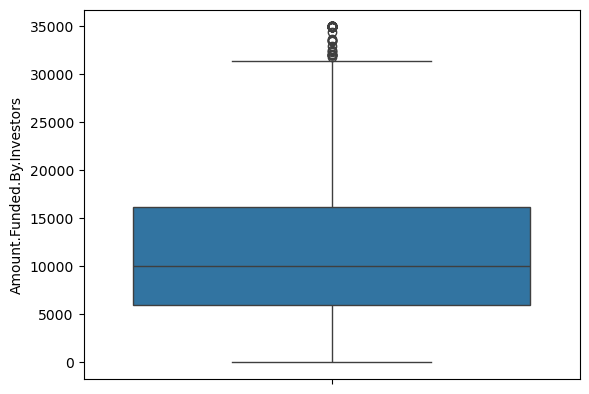

In [90]:
# checking for outliers

sns.boxplot(data = loansdata['Amount.Funded.By.Investors'])

In [91]:
#Treating outliers

In [92]:
loansdata['Interest.Rate'] = loansdata['Interest.Rate'].sort_values()

In [93]:
q1 = loansdata['Interest.Rate'].quantile(0.25)
q3 = loansdata['Interest.Rate'].quantile(0.75)
IQR = q3 - q1
Lower_cutoff = q1 - 1.5 * IQR
upper_cutoff = q3 + 1.5 * IQR
loansdata['Interest.Rate'] = loansdata['Interest.Rate'].clip(lower = Lower_cutoff, upper = upper_cutoff)

<Axes: ylabel='Interest.Rate'>

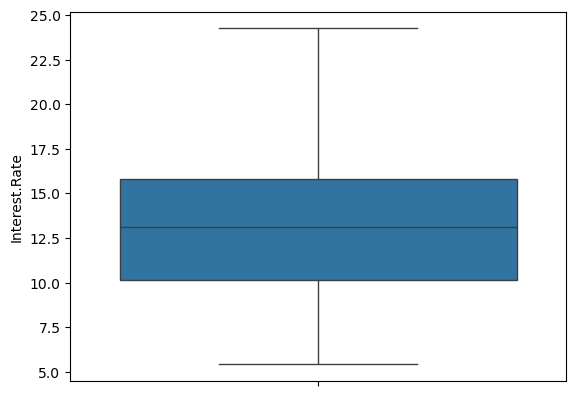

In [94]:
sns.boxplot(data = loansdata['Interest.Rate'])

In [95]:
q1 = loansdata['Amount.Funded.By.Investors'].quantile(0.25)
q3 = loansdata['Amount.Funded.By.Investors'].quantile(0.75)
IQR = q3 - q1
lower_cuttoff = q1 - 1.5 * IQR
upper_cutoff = q3 + 1.5* IQR

loansdata['Amount.Funded.By.Investors'] = loansdata['Amount.Funded.By.Investors'].clip(lower_cuttoff,upper_cutoff)

<Axes: ylabel='Amount.Funded.By.Investors'>

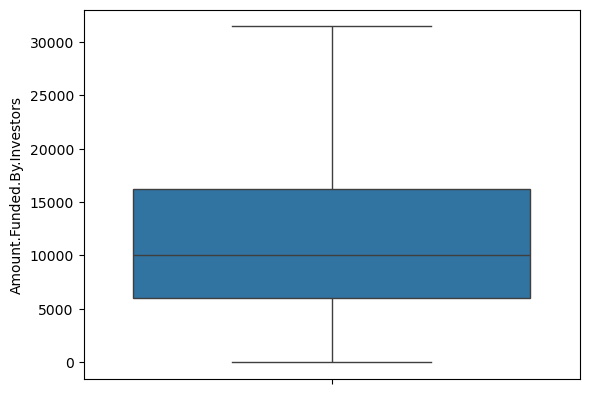

In [96]:
sns.boxplot(data = loansdata['Amount.Funded.By.Investors'])

In [97]:
#TESTNG

In [98]:
loansdata[['Interest.Rate', 'Amount.Funded.By.Investors']]

,Interest.Rate,Amount.Funded.By.Investors
0,8.90,20000.00
1,12.12,19200.00
2,21.98,31437.50
3,9.99,9975.00
4,11.71,12000.00
...,...,...
2495,16.77,29950.00
2496,14.09,16000.00
2497,13.99,10000.00
2498,12.42,6000.00


In [99]:
stats.ttest_ind(loansdata['Interest.Rate'], loansdata['Amount.Funded.By.Investors'])

TtestResult(statistic=-78.19712840233261, pvalue=0.0, df=4824.0)

In [100]:
loansdata[['Interest.Rate', 'Amount.Funded.By.Investors']]

,Interest.Rate,Amount.Funded.By.Investors
0,8.90,20000.00
1,12.12,19200.00
2,21.98,31437.50
3,9.99,9975.00
4,11.71,12000.00
...,...,...
2495,16.77,29950.00
2496,14.09,16000.00
2497,13.99,10000.00
2498,12.42,6000.00


In [101]:
loansdata[['Amount.Funded.By.Investors','Interest.Rate']].corr()

,Amount.Funded.By.Investors,Interest.Rate
Amount.Funded.By.Investors,1.000000,0.332739
Interest.Rate,0.332739,1.000000


In [102]:
stats.pearsonr(loansdata['Interest.Rate'], loansdata['Amount.Requested'])

PearsonRResult(statistic=0.32642868508191825, pvalue=5.0976491330122536e-61)

In [103]:
group_36 = loansdata[loansdata['Loan.Length'] == "36 months"]['Interest.Rate']
group_60 = loansdata[loansdata['Loan.Length'] == "60 months"]['Interest.Rate']
stats.f_oneway(group_36,group_60)

F_onewayResult(statistic=531.6534262593598, pvalue=1.799999706138135e-106)

In [104]:
loansdata['Loan.Length'] = loansdata['Loan.Length'].str.replace('months','').astype('float')

In [105]:
stats.pearsonr(loansdata['Interest.Rate'], loansdata['Loan.Length'])

PearsonRResult(statistic=0.4250546295106784, pvalue=1.799999706137092e-106)

In [106]:
loansdata.head(1)

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,20000.0,20000.0,8.9,36.0,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year


In [107]:
S1 = loansdata[loansdata['Loan.Purpose'] == "debt_consolidation"]['Interest.Rate']
S2 = loansdata[loansdata['Loan.Purpose'] == "credit_card"]['Interest.Rate']
S3 = loansdata[loansdata['Loan.Purpose'] == "other"]['Interest.Rate']
S4 = loansdata[loansdata['Loan.Purpose'] == "moving"]['Interest.Rate']
S5 = loansdata[loansdata['Loan.Purpose'] == "car"]['Interest.Rate']
S6 = loansdata[loansdata['Loan.Purpose'] == "vacation"]['Interest.Rate']
S7 = loansdata[loansdata['Loan.Purpose'] == "medical"]['Interest.Rate']
S8 = loansdata[loansdata['Loan.Purpose'] == "wedding"]['Interest.Rate']
S9 = loansdata[loansdata['Loan.Purpose'] == "small_business"]['Interest.Rate']
S10 = loansdata[loansdata['Loan.Purpose'] == "home_improvement"]['Interest.Rate']
S11 = loansdata[loansdata['Loan.Purpose'] == "house"]['Interest.Rate']
S12 = loansdata[loansdata['Loan.Purpose'] == "major_purchase"]['Interest.Rate']
S13 = loansdata[loansdata['Loan.Purpose'] == "educational"]['Interest.Rate']
S14 = loansdata[loansdata['Loan.Purpose'] == "renewable_energy"]['Interest.Rate']

In [108]:
loansdata['Loan.Purpose'].unique()

array(['debt_consolidation', 'credit_card', 'other', 'moving', 'car',
       'vacation', 'home_improvement', 'house', 'major_purchase',
       'educational', 'medical', 'wedding', 'small_business',
       'renewable_energy'], dtype=object)

In [109]:
stats.f_oneway(S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14)

F_onewayResult(statistic=7.33138172754489, pvalue=2.7563442993460577e-14)

In [110]:
# We reject null hypothesis

In [111]:
loansdata.dtypes

Amount.Requested                  float64
Amount.Funded.By.Investors        float64
Interest.Rate                     float64
Loan.Length                       float64
Loan.Purpose                       object
Debt.To.Income.Ratio               object
State                              object
Home.Ownership                     object
Monthly.Income                    float64
FICO.Range                         object
Open.CREDIT.Lines                 float64
Revolving.CREDIT.Balance          float64
Inquiries.in.the.Last.6.Months    float64
Employment.Length                  object
dtype: object

In [112]:
contigency = pd.crosstab(loansdata['FICO.Range'], loansdata['Home.Ownership'])

In [113]:
stats.chi2_contingency(contigency)
#There is relationship
## people who owns a house has high FICO score as compare to people who doesn't

Chi2ContingencyResult(statistic=269.7881202757335, pvalue=3.087547281383599e-15, dof=111, expected_freq=array([[2.29796933e+00, 1.03605470e-02, 3.91628678e-01, 2.30004144e+00],
       [1.37878160e+00, 6.21632822e-03, 2.34977207e-01, 1.38002487e+00],
       [4.59593867e-01, 2.07210941e-03, 7.83257356e-02, 4.60008288e-01],
       [1.83837547e+00, 8.28843763e-03, 3.13302942e-01, 1.84003315e+00],
       [5.42320763e+01, 2.44508910e-01, 9.24243680e+00, 5.42809780e+01],
       [6.34239536e+01, 2.85951098e-01, 1.08089515e+01, 6.34811438e+01],
       [7.67521757e+01, 3.46042271e-01, 1.30803978e+01, 7.68213842e+01],
       [7.39946125e+01, 3.33609615e-01, 1.26104434e+01, 7.40613344e+01],
       [7.21562370e+01, 3.25321177e-01, 1.22971405e+01, 7.22213013e+01],
       [5.88280149e+01, 2.65230004e-01, 1.00256942e+01, 5.88810609e+01],
       [6.20451720e+01, 2.79734770e-01, 1.05739743e+01, 6.21011189e+01],
       [6.71007045e+01, 3.02527973e-01, 1.14355574e+01, 6.71612101e+01],
       [5.69896395e+

# BUSINESS PROBLEM 2

In [115]:
price_quotes = pd.read_csv(r'C:\Users\DELL\Desktop\Python\4. Basic Statistics - Hypothesis Testing\Price_Quotes.csv')

In [116]:
price_quotes.shape

(12, 3)

In [117]:
price_quotes

,Order_Number,Barry_Price,Mary_Price
0,1,126,114
1,2,110,118
2,3,138,114
3,4,142,111
4,5,146,129
5,6,136,119
6,7,94,97
7,8,103,104
8,9,140,127
9,10,152,133


In [118]:
price_quotes.dtypes

Order_Number    int64
Barry_Price     int64
Mary_Price      int64
dtype: object

In [119]:
print(dir(stats))

['BootstrapMethod', 'CensoredData', 'ConstantInputWarning', 'Covariance', 'DegenerateDataWarning', 'FitError', 'MonteCarloMethod', 'NearConstantInputWarning', 'PermutationMethod', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_ansari_swilk_statistics', '_axis_nan_policy', '_biasedurn', '_binned_statistic', '_binomtest', '_boost', '_bws_test', '_censored_data', '_common', '_constants', '_continuous_distns', '_covariance', '_crosstab', '_discrete_distns', '_distn_infrastructure', '_distr_params', '_entropy', '_fit', '_hypotests', '_kde', '_ksstats', '_levy_stable', '_mannwhitneyu', '_morestats', '_mstats_basic', '_mstats_extras', '_multicomp', '_multivariate', '_mvn', '_odds_ratio', '_page_trend_test', '_qmc', '_qmc_cy', '_qmvnt', '_rcont', '_relative_risk', '_resampling', '_rvs_sampling', '_sampling', '_sensitivity_analysis', '_sobol', '_stats', '_stats_mstats_common', '_stats_py', '_stats_pythran', '_su

In [120]:
stats.ttest_rel(price_quotes['Barry_Price'],price_quotes['Mary_Price'])

TtestResult(statistic=2.5213765108923494, pvalue=0.02840588045242053, df=11)

## BUSINESS PROBLEM 3

In [122]:
Treatment_fac = pd.read_csv(r'C:\Users\DELL\Desktop\Python\4. Basic Statistics - Hypothesis Testing\Treatment_Facility.csv')

In [123]:
Treatment_fac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              20 non-null     int64  
 1   Reengineer         20 non-null     object 
 2   Employee_Turnover  20 non-null     float64
 3   VAR4               20 non-null     float64
 4   VAR5               20 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 932.0+ bytes


In [124]:
Post = Treatment_fac[Treatment_fac['Reengineer'] == 'Post']['VAR5']
Pre = Treatment_fac[Treatment_fac['Reengineer'] == 'Prior']['VAR5']

In [125]:
Post

13    29.126214
14    21.008403
15    34.782609
16    19.900498
17     9.950249
18    25.531915
19    23.148148
Name: VAR5, dtype: float64

In [126]:
Pre

0      42.682927
1      25.806452
2     146.198830
3     110.429448
4      23.952096
5      47.058824
6       0.000000
7      25.000000
8     132.183908
9      16.574586
10     88.757396
11     31.746032
12     10.152284
Name: VAR5, dtype: float64

In [127]:
stats.ttest_ind(Pre,Post)

TtestResult(statistic=1.627914425352865, pvalue=0.12091989189884148, df=18.0)

In [128]:
Treatment_fac

,Month,Reengineer,Employee_Turnover,VAR4,VAR5
0,1,Prior,0.0000,24.390244,42.682927
1,2,Prior,6.0606,19.354839,25.806452
2,3,Prior,12.1212,35.087719,146.198830
3,4,Prior,3.3333,18.404908,110.429448
4,5,Prior,12.9032,17.964072,23.952096
5,6,Prior,9.6774,41.176471,47.058824
6,7,Prior,11.7647,13.422819,0.000000
7,8,Prior,11.4286,31.250000,25.000000
8,9,Prior,23.0769,17.241379,132.183908
9,10,Prior,15.0000,16.574586,16.574586


In [129]:
stats.levene(Pre, Post)  ### To check variance 

LeveneResult(statistic=4.1167822200189494, pvalue=0.05751543806297124)

In [130]:
## WIth the given data we can not say that their is any effect on the reengineering efforts.

## BUSINESS PROBLEM 4

In [132]:
Priority_ass = pd.read_csv(r'C:\Users\DELL\Desktop\Python\4. Basic Statistics - Hypothesis Testing\\Priority_Assessment.csv')

In [133]:
Priority_ass.head(3)

,Days,Priority
0,3.3,High
1,7.9,Medium
2,0.3,High


In [134]:
High = Priority_ass[Priority_ass['Priority'] == 'High']['Days']
Medium = Priority_ass[Priority_ass['Priority'] == 'Medium']['Days']
Low = Priority_ass[Priority_ass['Priority'] == 'Low']['Days']

In [135]:
stats.f_oneway(High,Medium,Low)

F_onewayResult(statistic=1.812311010076072, pvalue=0.16411459461716182)

## Business Problem 5

In [137]:
Films = pd.read_csv(r'C:\Users\DELL\Desktop\Python\4. Basic Statistics - Hypothesis Testing\Films.csv')

In [138]:
Films.dropna(axis = 0, inplace = True)

In [139]:
Films.isna().sum()

_rowstate_        0
Movie             0
Gender            0
Marital_Status    0
Sinage            0
Parking           0
Clean             0
Overall           0
Age               0
Income            0
Hear_About        0
dtype: int64

In [140]:
# What is the overall level of customer satisfaction?

In [141]:
overall = Films.groupby('Overall')[['Overall']].count()

In [142]:
overall

,Overall
Overall,
1.0,137
2.0,148
3.0,12
4.0,1
5.0,3


In [143]:
overall = overall.rename( columns={'Overall': 'count'}).reset_index()


In [144]:
overall.groupby('count')['count'].mean()

count
1        1.0
3        3.0
12      12.0
137    137.0
148    148.0
Name: count, dtype: float64

In [145]:
overall =overall.rename( columns={'Overall': 'Satisfaction level'})

In [146]:
overall

,Satisfaction level,count
0,1.0,137
1,2.0,148
2,3.0,12
3,4.0,1
4,5.0,3


In [147]:
overall['Prob'] = overall['count'] / overall['count'].sum()

In [148]:
overall

,Satisfaction level,count,Prob
0,1.0,137,0.455150
1,2.0,148,0.491694
2,3.0,12,0.039867
3,4.0,1,0.003322
4,5.0,3,0.009967


# What factors are linked to satisfaction?
Ho - No relation
H1 - Related

In [150]:
Si = pd.crosstab(Films['Sinage'],Films['Overall'])
P = pd.crosstab(Films['Parking'],Films['Overall'])
c = pd.crosstab(Films['Clean'],Films['Overall'])


In [151]:
stats.chi2_contingency(Si)

Chi2ContingencyResult(statistic=121.32462033201084, pvalue=3.054444776360607e-18, dof=16, expected_freq=array([[4.77906977e+01, 5.16279070e+01, 4.18604651e+00, 3.48837209e-01,
        1.04651163e+00],
       [6.37209302e+01, 6.88372093e+01, 5.58139535e+00, 4.65116279e-01,
        1.39534884e+00],
       [2.04817276e+01, 2.21262458e+01, 1.79401993e+00, 1.49501661e-01,
        4.48504983e-01],
       [2.73089701e+00, 2.95016611e+00, 2.39202658e-01, 1.99335548e-02,
        5.98006645e-02],
       [2.27574751e+00, 2.45847176e+00, 1.99335548e-01, 1.66112957e-02,
        4.98338870e-02]]))

In [152]:
stats.chi2_contingency(P)

Chi2ContingencyResult(statistic=218.79348282085004, pvalue=1.2264032549812005e-37, dof=16, expected_freq=array([[5.55282392e+01, 5.99867110e+01, 4.86378738e+00, 4.05315615e-01,
        1.21594684e+00],
       [6.32657807e+01, 6.83455150e+01, 5.54152824e+00, 4.61794020e-01,
        1.38538206e+00],
       [1.31993355e+01, 1.42591362e+01, 1.15614618e+00, 9.63455150e-02,
        2.89036545e-01],
       [3.18604651e+00, 3.44186047e+00, 2.79069767e-01, 2.32558140e-02,
        6.97674419e-02],
       [1.82059801e+00, 1.96677741e+00, 1.59468439e-01, 1.32890365e-02,
        3.98671096e-02]]))

In [153]:
stats.chi2_contingency(c)

Chi2ContingencyResult(statistic=129.0342392337068, pvalue=9.882317099745693e-20, dof=16, expected_freq=array([[6.09900332e+01, 6.58870432e+01, 5.34219269e+00, 4.45182724e-01,
        1.33554817e+00],
       [6.28106312e+01, 6.78538206e+01, 5.50166113e+00, 4.58471761e-01,
        1.37541528e+00],
       [1.00132890e+01, 1.08172757e+01, 8.77076412e-01, 7.30897010e-02,
        2.19269103e-01],
       [2.27574751e+00, 2.45847176e+00, 1.99335548e-01, 1.66112957e-02,
        4.98338870e-02],
       [9.10299003e-01, 9.83388704e-01, 7.97342193e-02, 6.64451827e-03,
        1.99335548e-02]]))

In [154]:
Films[['Overall','Sinage','Parking','Clean']].corr()

,Overall,Sinage,Parking,Clean
Overall,1.000000,0.410689,0.547717,0.385523
Sinage,0.410689,1.000000,0.470412,0.365028
Parking,0.547717,0.470412,1.000000,0.457018
Clean,0.385523,0.365028,0.457018,1.000000


In [155]:
# What is the demographic profile of Film on the Rocks patrons?

In [156]:
GenderP = Films.groupby('Gender')[['Gender']].count()
GenderP

,Gender
Gender,
1,93
2,179
Female,16
Male,13


In [157]:
GenderP = GenderP.rename(columns = {'Gender' : 'Count'}).reset_index()
GenderP

,Gender,Count
0,1,93
1,2,179
2,Female,16
3,Male,13


In [158]:
GenderP['Prob'] = GenderP['Count']/GenderP['Count'].sum()

In [159]:
GenderP

,Gender,Count,Prob
0,1,93,0.308970
1,2,179,0.594684
2,Female,16,0.053156
3,Male,13,0.043189


In [160]:
Films['Gender'] = Films['Gender'].replace({'1': 'Male', '2': 'Female'})

In [161]:
Films

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5
2,0,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,2.0,4.0,1.0,5
3,0,Ferris Buellers Day Off,Female,Married,1.0,3.0,2.0,2.0,4.0,1.0,5
4,0,Ferris Buellers Day Off,Female,Married,1.0,1.0,1.0,1.0,3.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...
325,0,Old School,Female,2,1.0,2.0,1.0,1.0,2.0,1.0,1
326,0,Old School,Male,1,2.0,2.0,2.0,2.0,3.0,3.0,5
327,0,Old School,Female,1,2.0,1.0,1.0,2.0,2.0,2.0,5
328,0,Old School,Male,1,1.0,1.0,1.0,1.0,2.0,1.0,3


In [162]:
## In what media outlet(s) should the film series be advertised?

In [163]:
HA = Films.groupby('Hear_About')[['Hear_About']].count()

In [164]:
HA = HA.rename(columns = {'Hear_About' : 'Count'}).reset_index()

In [165]:
HA['Prob'] = HA['Count']/HA['Count'].sum()

In [166]:
HA

,Hear_About,Count,Prob
0,1,19,0.063123
1,"1,5",1,0.003322
2,2,11,0.036545
3,"2,5",2,0.006645
4,3,13,0.043189
5,"3,4",1,0.003322
6,"3,5",1,0.003322
7,4,39,0.129568
8,"4,5",1,0.003322
9,5,212,0.704319


In [167]:
### Word of Mouth